<a href="https://colab.research.google.com/github/aryanmanik29/ml/blob/main/Snippets_Importing_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
!apt-get -qq install -y libfluidsynth1

In [22]:
import tensorflow as tf

# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive)

In [9]:
import sklearn

# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [10]:
from sklearn.datasets import load_sample_image

In [11]:
china = load_sample_image("china.jpg")/255
flower= load_sample_image("flower.jpg")/255

In [13]:
import numpy as np

# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [14]:
images=np.array([china,flower])
batch_size, height , width,channels=images.shape

In [15]:
filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32)

In [16]:
filters[:,3,:,0]=1

In [17]:
filters[3,:,:,1]=1

In [19]:
import matplotlib.pyplot as plt

In [23]:
outputs = tf.nn.conv2d(images,filters,strides=1,padding="SAME")

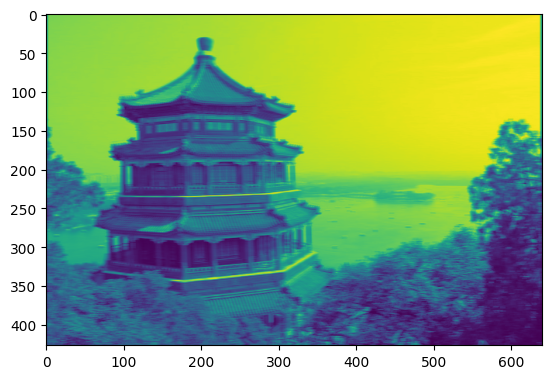

In [24]:
plt.imshow(outputs[0,:,:,1])

In [26]:
from tensorflow import keras

In [27]:
conv = keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding="SAME",activation="relu")

In [28]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [29]:
output2 = tf.nn.max_pool(images,ksize=(1,1,1,3),strides=(1,1,1,3),padding="VALID")

In [30]:
global_avg_pool=keras.layers.GlobalAvgPool2D()

In [31]:
from functools import partial

In [32]:
DefaultConv2D=partial(keras.layers.Conv2D,kernel_size=3,activation='relu',padding="SAME")

In [36]:
model=keras.models.Sequential([DefaultConv2D(filters=64,kernel_size=7,input_shape=[28,28,1]),keras.layers.MaxPooling2D(pool_size=2),DefaultConv2D(filters=128),DefaultConv2D(filters=128),keras.layers.MaxPooling2D(pool_size=2),DefaultConv2D(filters=256),DefaultConv2D(filters=256),keras.layers.MaxPooling2D(pool_size=2),keras.layers.Flatten(),keras.layers.Dense(units=128,activation='relu'),keras.layers.Dropout(0.5),keras.layers.Dense(units=64,activation='relu'),keras.layers.Dropout(0.5),keras.layers.Dense(units=10,activation='softmax'),])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.compile(
    optimizer='adam',              # Optimizer: 'adam', 'sgd', etc.
    loss='sparse_categorical_crossentropy',  # Loss function: 'categorical_crossentropy', 'binary_crossentropy', etc.
    metrics=['accuracy']           # Metrics to monitor during training
)

In [53]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


In [54]:
x_valid=X_train[:10000]

In [42]:
y_valid=y_train[:10000]

In [43]:
train=X_train[10000:]

In [44]:
train_y=y_train[10000:]

In [ ]:
history=model.fit(train,train_y,epochs=10,validation_data=(x_valid,y_valid))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 771s 492ms/step - accuracy: 0.6211 - loss: 1.1850 - val_accuracy: 0.9618 - val_loss: 0.1461
Epoch 2/30
 242/1563 ━━━━━━━━━━━━━━━━━━━━ 10:09 461ms/step - accuracy: 0.9360 - loss: 0.2324

In [47]:
x_valid.shape

(10000, 28, 28)

In [48]:
train.shape

(50000, 28, 28)

In [50]:
train_y.shape

(50000,)

In [51]:
y_valid.shape

(10000,)